# Mixed Model formulation for getting Local and Global effects

## Importing the libraries

In [1]:
import pickle
from Functions import *
from matplotlib.pyplot import *

## Getting the data

In [2]:
Data = pickle.load( open( "ts2.p", "rb" ) )

## Fitting and plotting

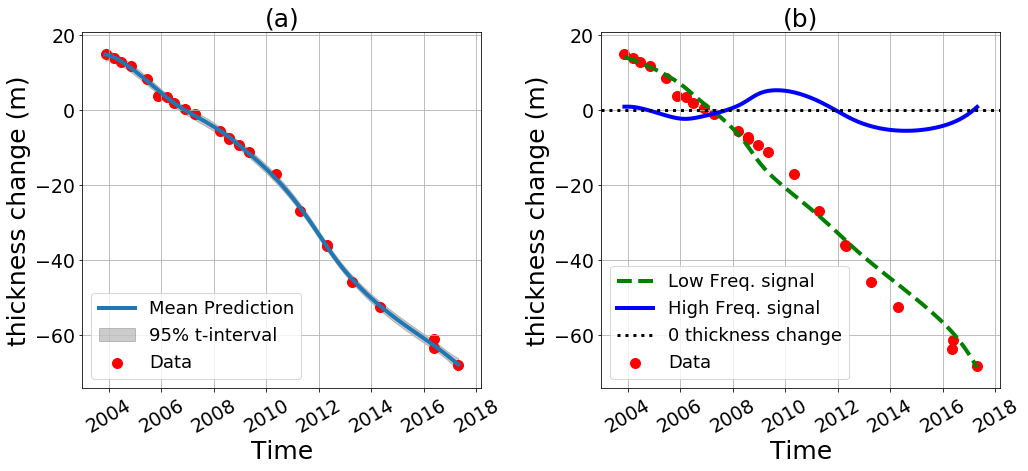

In [3]:
fig = figure(figsize=(15,5))
ax = subplot2grid((1,2),(0,0))
ax.grid(True)

## Fitting REML model
p = 4;q=3
n = int(Data.shape[0])
par = [0.1,0.1]
## Learning and Predicting

U = Kno_pspline_opt(Data,p,n)
B = Basis_Pspline(n,p,U,Data[:,0])
c = n+p
P = Penalty_p(q,c)
X,Z,C,sigma,D = XZsigma(B,P,q)
lamb,sig = max_reml(par,Data,X,Z,sigma)
### Predicting
num = 200
xpred = linspace(Data[0,0],Data[-1,0],num)
Bpred = Basis_Pspline(n,p,U,xpred)
Xpred,Zpred,Cpred,sigma,D = XZsigma(Bpred,P,q)
ypred3,std_t3,std_n3 = Inference(Data,Cpred,C,lamb,sig,D,confidence=0.95)

ax.plot(xpred,ypred3,linewidth=4,label='Mean Prediction')
#ax.set_title('Time Series 3 (REML)',size = 20)
ax.set_title('(a)',size = 25)
ax.tick_params(axis='x', labelsize=19)
ax.tick_params(axis='y', labelsize=19)
ax.set_xlabel('Time',size=25)
ax.set_ylabel('thickness change (m)',size = 25)
ax.fill_between(xpred.flatten(),ypred3.flatten()-std_t3,ypred3.flatten()+std_t3, alpha = 0.2,color = 'k',label = '95% t-interval')
ax.grid(True)
ax.set_xticks(np.arange(2004, 2020, step=2))
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(30)
ax.scatter(Data[:,0],Data[:,1],label = 'Data',color = 'r',s=100)
ax.legend(fontsize=18,loc = 3)



####### Plotting high and Low Frequency Components
ax = subplot2grid((1,2),(0,1))

f_low,f_high = Inference_effects(q,Data,Cpred,C,lamb,D)
ax.plot(xpred,f_low,lw = 4,color = 'g', label = 'Low Freq. signal', linestyle = '--')
ax.plot(xpred,f_high,lw = 4, color = 'b', label = 'High Freq. signal')

#ax.set_title('Time Series 3 (REML): Signal Decomposition',size = 20)
ax.set_title('(b)',size = 25)
ax.tick_params(axis='x', labelsize=19)
ax.tick_params(axis='y', labelsize=19)
ax.set_xlabel('Time',size=25)
ax.set_ylabel('thickness change (m)',size = 25)
#ax.fill_between(xpred.flatten(),ypred3.flatten()-std_t3,ypred3.flatten()+std_t3, alpha = 0.2,color = 'k',label = '95% t-interval')
ax.grid(True)
ax.axhline(y=0, color='k', linestyle=':',label = '0 thickness change',lw=3)
ax.scatter(Data[:,0],Data[:,1],label = 'Data',color = 'r',s=100)
#subplots_adjust(left=0.19, bottom = 0, right = 0.94, top = 0.79,wspace = 0.3,hspace = 0.3)   # determines the padding on the graph
ax.legend(fontsize=18)
ax.set_xticks(np.arange(2004, 2020, step=2))

for label in ax.xaxis.get_ticklabels():
    label.set_rotation(30)
subplots_adjust(left=0.09, bottom = 0, right = 0.94, top = 0.99,wspace = 0.3,hspace = 0.3)   # determines the padding on the graph

show()